In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file = ""

#download = https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings
df = pd.read_csv(file)


In [27]:
df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [28]:
len(df) #How many tuples are in the dataset

1795

In [29]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [30]:
#How many unique company names are there in the dataset?
len(df["Company \n(Maker-if known)"].unique())

416

In [31]:
df["Review\nDate"].unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2009, 2010, 2017, 2008, 2007,
       2006])

In [32]:
#How many review were made in 2013?
len(df[df["Review\nDate"] == 2013])

184

In [33]:
#How many missing values are in the Bean Type column?
df.isna().sum()



Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

(array([  4.,  13.,  32., 141., 259., 644., 602.,  98.,   0.,   2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

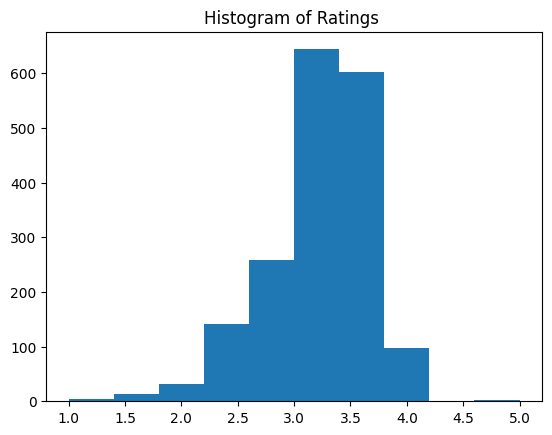

In [34]:
#An output plot of the histogram of the values in the column named Ratings

plt.title("Histogram of Ratings ")
plt.hist(df["Rating"], bins = 10)



In [35]:
# Convert to float (whole percentage)
df["Cocoa\nPercent"] = df["Cocoa\nPercent"].str.rstrip('%').astype('float')

In [36]:
df["Cocoa\nPercent"]

0       63.0
1       70.0
2       70.0
3       70.0
4       70.0
        ... 
1790    70.0
1791    65.0
1792    65.0
1793    62.0
1794    65.0
Name: Cocoa\nPercent, Length: 1795, dtype: float64

Text(0.5, 1.0, 'Cocoa Percent vs Rating')

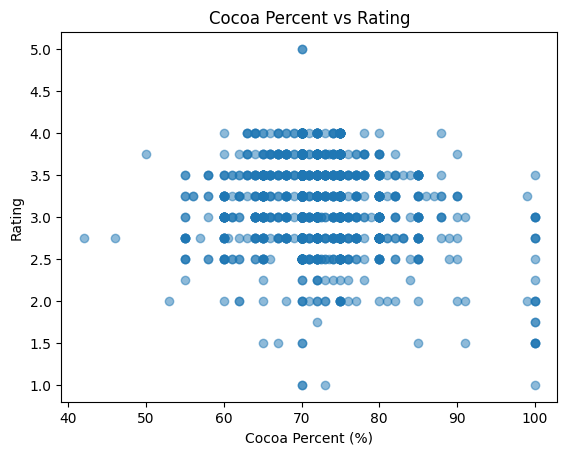

In [43]:

plt.title("cocoa percent vs rating")

plt.scatter(df["Cocoa\nPercent"], df["Rating"], alpha = 0.5)

plt.xlabel('Cocoa Percent (%)')
plt.ylabel('Rating')
plt.title('Cocoa Percent vs Rating')



In [48]:
#Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df["Normalized_Rating"] = scaler.fit_transform(df[["Rating"]])


df[["Rating", "Normalized_Rating"]]


,Rating,Normalized_Rating
0,3.75,0.6875
1,2.75,0.4375
2,3.00,0.5000
3,3.50,0.6250
4,3.50,0.6250
...,...,...
1790,3.75,0.6875
1791,3.00,0.5000
1792,3.50,0.6250
1793,3.25,0.5625


In [52]:
#List the companies ordered by their average score (averaged over each company’s reviews).

company_average_score = df.groupby("Company \n(Maker-if known)")["Normalized_Rating"].mean()
company_average_score = company_average_score.sort_values(ascending=False)

company_average_score 


Company \n(Maker-if known)
Tobago Estate (Pralus)                  0.750000
Ocelot                                  0.718750
Heirloom Cacao Preservation (Zokoko)    0.718750
Amedei                                  0.711538
Matale                                  0.703125
                                          ...   
Love Bar                                0.250000
Majani                                  0.250000
Machu Picchu Trading Co.                0.218750
Callebaut                               0.218750
Cote d' Or (Kraft)                      0.000000
Name: Normalized_Rating, Length: 416, dtype: float64